<a href="https://colab.research.google.com/github/snehaangeline/Lora/blob/main/DECISIONTREELORA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==1.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

In [ ]:
df=pd.read_csv("/content/sample_data/predictdatatlora.csv")
df

,SNR,SPREADING FACTOR
0,-3.8,11
1,-4.3,11
2,-3.0,7
3,-7.0,12
4,-10.8,11
...,...,...
617,-8.3,8
618,-2.5,12
619,-11.3,11
620,-11.5,10


In [ ]:
X = pd.DataFrame(np.c_[df['SNR']], columns = ['SNR']).values
Y = df['SPREADING FACTOR'].values

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(1)
X = pca.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size=0.8, random_state=0)
print("Total", len(X))
print("Train size ", len(X_train))
print("Test size ", len(X_test))

Total 622
Train size  497
Test size  125


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg_tree = DecisionTreeRegressor(max_depth=2)
reg_tree

DecisionTreeRegressor(max_depth=2)

In [ ]:
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [ ]:
reg_tree.score(X_train, y_train)

0.23592293620933946

In [ ]:
reg_tree.score(X_test, y_test)

0.2440960866805304

In [ ]:
y_pred = reg_tree.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
mean_squared_error(y_test,y_pred)

2.2479251991233586

In [ ]:
r2_score(y_test,y_pred)

0.2440960866805304

In [ ]:
mean_absolute_error(y_test,y_pred)

1.2590912885827388

In [ ]:
print(x_ax)

range(0, 125)


In [ ]:
print(len(X_test))

125


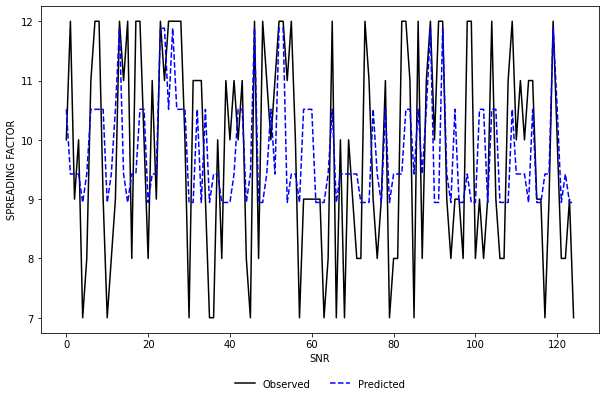

In [ ]:
plt.rcParams['figure.figsize']=(10,6)
x_ax=range(len(X_test))
plt.plot(x_ax,y_test,label='Observed',color='k',linestyle='-')
plt.plot(x_ax,y_pred,label='Predicted',color='b',linestyle='--')
plt.xlabel('SNR')
plt.ylabel('SPREADING FACTOR')
plt.legend(bbox_to_anchor=(0.5,-0.2),loc='lower center',ncol=2,frameon=False)

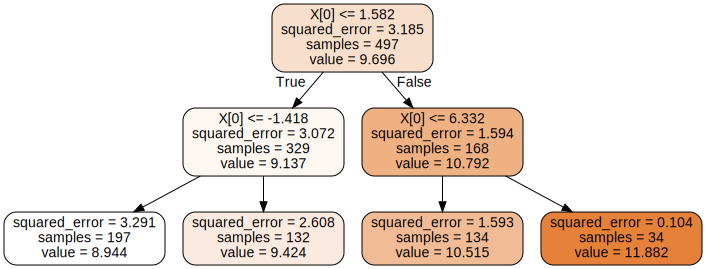

In [ ]:
import graphviz
from sklearn import tree
feature_names = ['X']

dot_data = tree.export_graphviz(reg_tree, out_file=None, filled=True, rounded=True,
                                )
graph = graphviz.Source(dot_data,format='png')

graph

In [ ]:
graph.render("reg_tree_graphivz")

'reg_tree_graphivz.png'

In [ ]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=dd6d9d0134fcdeb0183d2d6e4fced5a07f90fed0142e7e209ed925841c55b78d
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


In [ ]:
import warnings

warnings.filterwarnings('ignore')

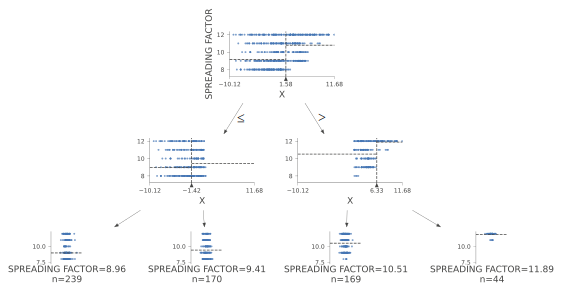

In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(reg_tree , X, Y,
                target_name="SPREADING FACTOR",
            feature_names = ['X','Y'])
viz

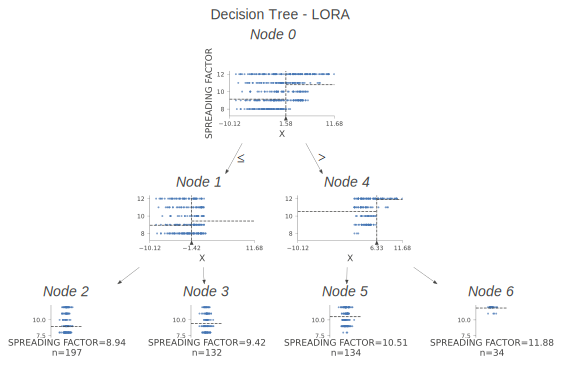

In [ ]:
viz = dtreeviz(reg_tree,
               x_data=X_train,
               y_data=y_train,
               target_name='SPREADING FACTOR',
               feature_names=['X','Y'],
               title="Decision Tree - LORA",
               show_node_labels = True)
viz

In [ ]:
viz.save("reg_tree.svg")